In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os

In [23]:
df=pd.read_excel(r'E:\Batch 52- Day12\korea_data.xlsx')
df=df.replace('..','nan')

In [24]:
df.dtypes

Year                                                                       int64
GDP growth (annual %)                                                    float64
Gross capital formation (% of GDP)                                       float64
Population growth (annual %)                                             float64
Birth rate, crude (per 1,000 people)                                      object
Broad money growth (annual %)                                            float64
Final consumption expenditure (annual % growth)                          float64
General government final consumption expenditure (annual % growth)       float64
Gross capital formation (annual % growth)                                float64
Households and NPISHs Final consumption expenditure (annual % growth)    float64
Unemployment, total (% of total labor force) (national estimate)         float64
dtype: object

In [25]:
df = df.set_index('Year')
display(df)

,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1970,9.997407,26.338200,2.184174,31.2,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
1971,10.454693,25.558501,1.971324,31.2,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
1972,7.150715,21.404761,1.875999,28.4,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
1973,14.827554,25.872858,1.768293,28.3,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
1974,9.460873,32.533408,1.712705,26.6,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
1975,7.863512,28.959267,1.682000,24.8,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
1976,13.115159,27.555990,1.596559,22.2,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
1977,12.277661,30.630713,1.559039,22.7,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057


In [28]:
df=df.astype(float)
df.dtypes

GDP growth (annual %)                                                    float64
Gross capital formation (% of GDP)                                       float64
Population growth (annual %)                                             float64
Birth rate, crude (per 1,000 people)                                     float64
Broad money growth (annual %)                                            float64
Final consumption expenditure (annual % growth)                          float64
General government final consumption expenditure (annual % growth)       float64
Gross capital formation (annual % growth)                                float64
Households and NPISHs Final consumption expenditure (annual % growth)    float64
Unemployment, total (% of total labor force) (national estimate)         float64
dtype: object

In [29]:
df.isna().sum()

GDP growth (annual %)                                                    0
Gross capital formation (% of GDP)                                       0
Population growth (annual %)                                             0
Birth rate, crude (per 1,000 people)                                     1
Broad money growth (annual %)                                            0
Final consumption expenditure (annual % growth)                          0
General government final consumption expenditure (annual % growth)       0
Gross capital formation (annual % growth)                                0
Households and NPISHs Final consumption expenditure (annual % growth)    0
Unemployment, total (% of total labor force) (national estimate)         0
dtype: int64

In [32]:
column_names = {'Unemployment, total (% of total labor force) (national estimate)':'unemployment',
                'GDP growth (annual %)': 'gdp_growth',
                'Gross capital formation (% of GDP)':'gross_capital_formation',
                'Population growth (annual %)':'pop_growth', 
                'Birth rate, crude (per 1,000 people)':'birth_rate',
                'Broad money growth (annual %)':'broad_money_growth',                
                'Final consumption expenditure (% of GDP)':'final_consum_gdp',
                'Final consumption expenditure (annual % growth)':'final_consum_growth',
                'General government final consumption expenditure (annual % growth)':'gov_final_consum_growth',
                'Gross capital formation (annual % growth)':'gross_cap_form_growth',
                'Households and NPISHs Final consumption expenditure (annual % growth)':'hh_consum_growth'}

df = df.rename(columns = column_names)
df

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
1974,9.460873,32.533408,1.712705,26.600,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
1975,7.863512,28.959267,1.682000,24.800,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
1976,13.115159,27.555990,1.596559,22.200,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
1977,12.277661,30.630713,1.559039,22.700,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057


In [35]:
df.loc['1969':'2016'].head()

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.51
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.57
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.59
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.04


In [41]:
corr=df.corr()

<AxesSubplot:>

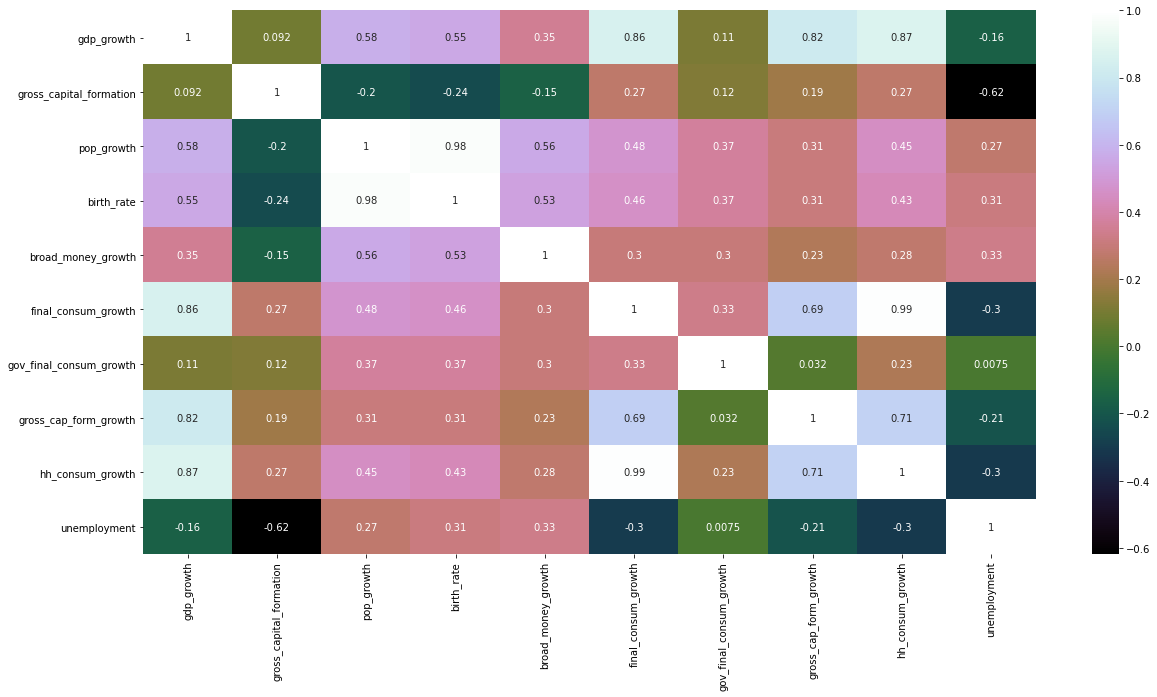

In [42]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='cubehelix',annot = True)


In [43]:
def corelation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range (len(  corr_matrix.columns)):
        for j in range (i):
            if corr_matrix.iloc[i,j]> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [45]:
cor_features = corelation ( df,0.7)
print (cor_features)

{'hh_consum_growth', 'gross_cap_form_growth', 'birth_rate', 'final_consum_growth'}


In [55]:
df_before = df
x1 = sm.tools.add_constant(df_before)
x1

,const,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,,
1969,1.0,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1970,1.0,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
1971,1.0,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
1972,1.0,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
1973,1.0,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
1974,1.0,9.460873,32.533408,1.712705,26.600,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
1975,1.0,7.863512,28.959267,1.682000,24.800,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
1976,1.0,13.115159,27.555990,1.596559,22.200,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
1977,1.0,12.277661,30.630713,1.559039,22.700,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057


In [58]:
df_after =df.drop(['gdp_growth','birth_rate', 'final_consum_growth','gross_capital_formation'], axis = 1)
display(df_after)


,pop_growth,broad_money_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,
1969,2.263434,60.984733,10.640799,29.908118,10.700325,4.8600
1970,2.184174,27.422864,7.279573,0.058667,10.557300,4.5100
1971,1.971324,20.844481,8.610547,15.172870,9.426969,4.5700
1972,1.875999,33.815028,8.134824,-13.056701,5.471355,4.5900
1973,1.768293,36.415629,2.287729,32.098276,8.927295,4.0400
1974,1.712705,24.036652,7.288576,31.493083,7.328337,4.1500
1975,1.682000,28.231630,6.960465,-1.493720,5.539527,4.1800
1976,1.596559,33.484656,0.560957,23.006080,8.254930,3.8076
1977,1.559039,39.705763,7.468013,31.486450,5.401645,3.8057


In [63]:
X2 = sm.tools.add_constant(df_after)
display (X2)


,const,pop_growth,broad_money_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,
1969,1.0,2.263434,60.984733,10.640799,29.908118,10.700325,4.8600
1970,1.0,2.184174,27.422864,7.279573,0.058667,10.557300,4.5100
1971,1.0,1.971324,20.844481,8.610547,15.172870,9.426969,4.5700
1972,1.0,1.875999,33.815028,8.134824,-13.056701,5.471355,4.5900
1973,1.0,1.768293,36.415629,2.287729,32.098276,8.927295,4.0400
1974,1.0,1.712705,24.036652,7.288576,31.493083,7.328337,4.1500
1975,1.0,1.682000,28.231630,6.960465,-1.493720,5.539527,4.1800
1976,1.0,1.596559,33.484656,0.560957,23.006080,8.254930,3.8076
1977,1.0,1.559039,39.705763,7.468013,31.486450,5.401645,3.8057


In [65]:
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)
print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                      28.352940
pop_growth                  2.014144
broad_money_growth          1.629540
gov_final_consum_growth     1.247040
gross_cap_form_growth       2.106755
hh_consum_growth            2.799328
unemployment                1.582816
dtype: float64

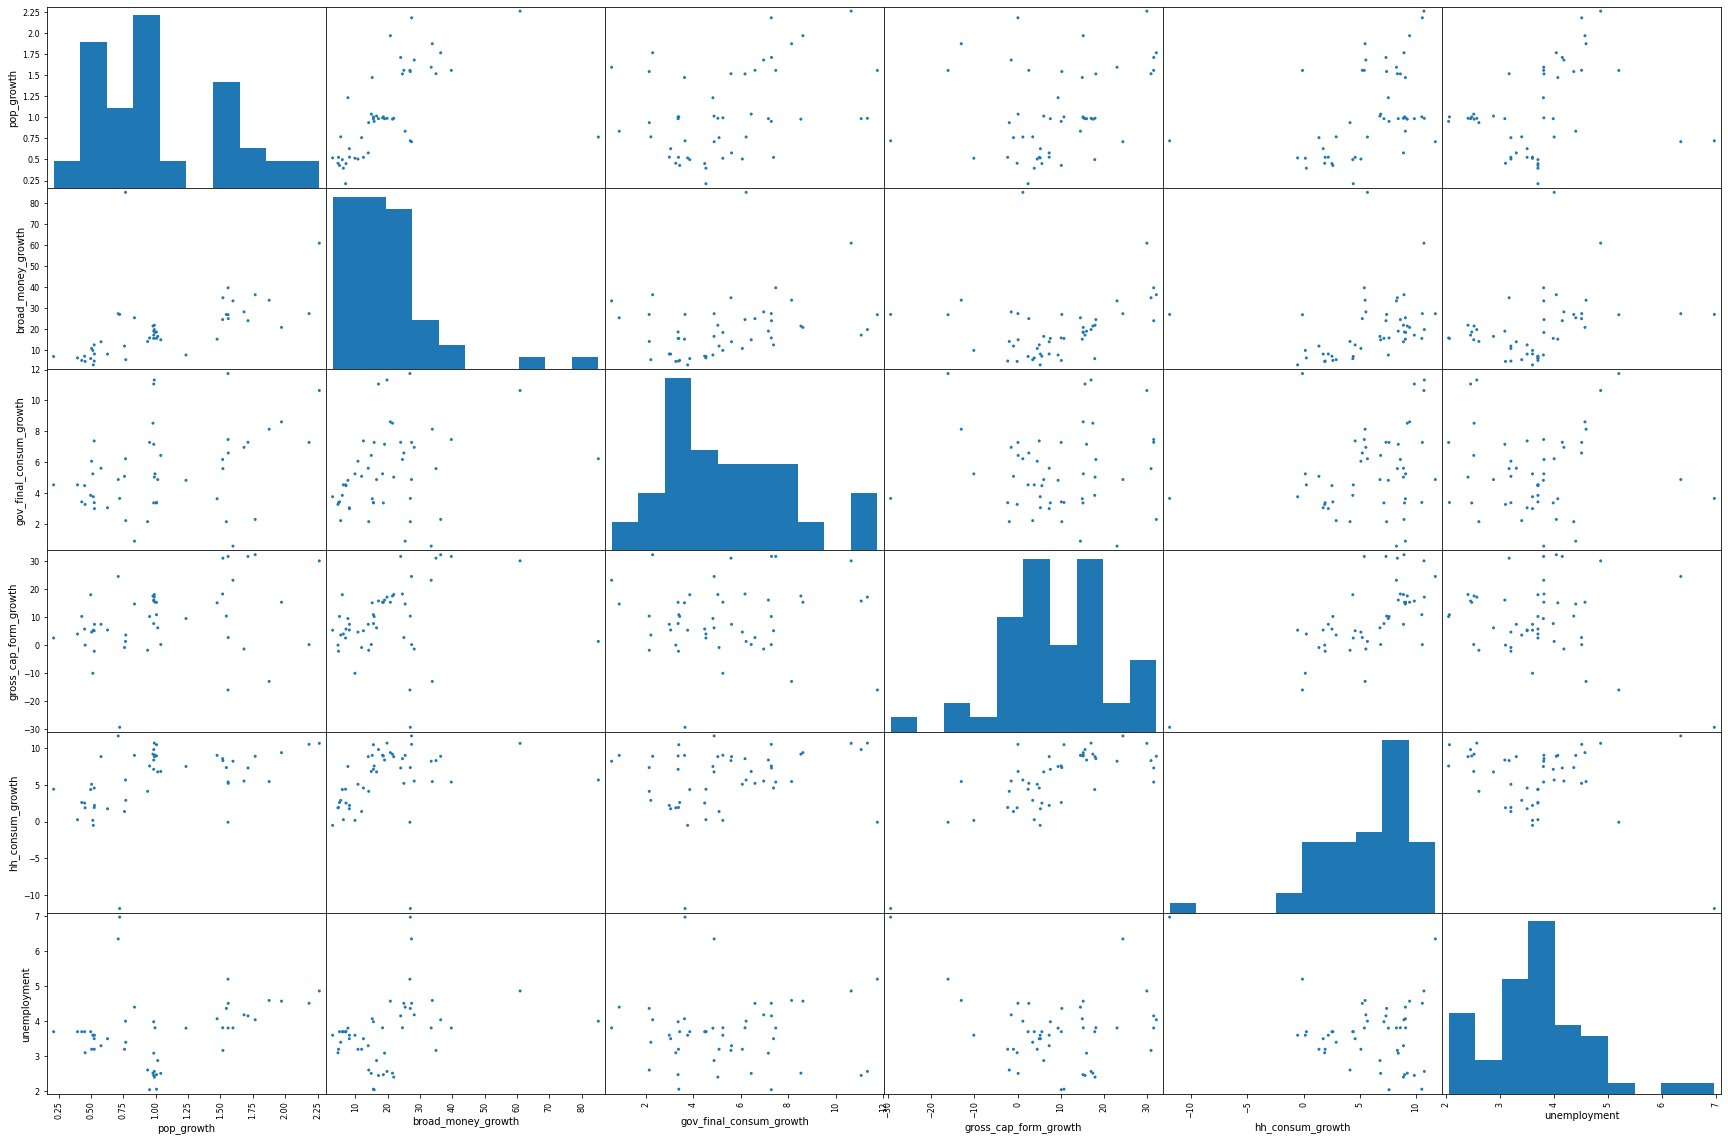

In [67]:
pd.plotting.scatter_matrix(df_after, alpha = 1, figsize = (30, 20))
plt.show()

In [71]:
desc_df = df.describe()
display (desc_df )

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
count,49.000000,49.000000,49.000000,48.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,7.194243,32.405530,1.045240,16.340896,20.113930,5.758657,5.378513,8.988990,5.812430,3.678543
std,4.208579,4.098204,0.516525,6.814683,14.757234,3.615251,2.610390,12.498723,4.209459,0.958478
min,-5.471219,21.404761,0.211998,7.900000,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,3.923677,29.943577,0.577957,9.950000,9.885949,2.981150,3.387772,2.417118,2.900586,3.167300
50%,7.432434,32.248290,0.985130,15.150000,17.174170,6.523265,5.031057,7.566111,6.853033,3.700000
75%,10.353951,34.455668,1.519197,21.750000,26.894645,8.168925,7.158110,15.948873,8.927295,4.068000
max,14.827554,41.374062,2.263434,31.200000,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000


In [83]:
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)
display(desc_df)

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
count,49.000000,49.000000,49.000000,48.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,7.194243,32.405530,1.045240,16.340896,20.113930,5.758657,5.378513,8.988990,5.812430,3.678543
std,4.208579,4.098204,0.516525,6.814683,14.757234,3.615251,2.610390,12.498723,4.209459,0.958478
min,-5.471219,21.404761,0.211998,7.900000,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,3.923677,29.943577,0.577957,9.950000,9.885949,2.981150,3.387772,2.417118,2.900586,3.167300
50%,7.432434,32.248290,0.985130,15.150000,17.174170,6.523265,5.031057,7.566111,6.853033,3.700000
75%,10.353951,34.455668,1.519197,21.750000,26.894645,8.168925,7.158110,15.948873,8.927295,4.068000
max,14.827554,41.374062,2.263434,31.200000,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000
+3_std,19.819980,44.700143,2.594816,36.784945,64.385633,16.604411,13.209683,46.485158,18.440807,6.553978
-3_std,-5.431495,20.110918,-0.504335,-4.103153,-24.157774,-5.087096,-2.452657,-28.507178,-6.815947,0.803108


In [84]:
remove_df = df[(np.abs(stats.zscore(df)) >= 3).all(axis=1)]
remove_df

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,


In [86]:
remove_df.index.difference(remove_df.index)

Int64Index([], dtype='int64', name='Year')